# BIMM 185 Lab Report 2
*Eric Mauritzen*



## Tuesday, April 11
### Exercise 1

We had to iterate over all directories in dirtree and extract the top GSAT Z-score from reach report.tbl file.  We compiled these into an output file with the basedirectory and z-score sorted by z-score first then basedirectory.

![title](Exercise1.png) 

The exercise was a good refresher on shell scripting and I learned to use trhe sort utility to sort multiple columns at a time.

### Exercise 2: E. Coli Genome
Questions:
- What is the name and length of the largest protein?
- What is the name and length of the smallest protein?
- How many proteins in forward strand?
- How many proteins in reverse strand?
- What is the largest protein in forward strand?
- What are the gene names of all ribosomal proteins?


These questions are answered by the following cells

In [1]:
import pandas as pd
import numpy as np
df = pd.read_table('ProteinTable.txt')

In [2]:
# What are the longest proteins?
df.sort_values('Length', ascending=False)[['Locus','Length']].iloc[0:2]

,Locus,Length
1872,yeeJ,2358
2387,yfhM,1653


In [3]:
# What are the shortest proteins?
df.sort_values('Length', ascending=True)[['Locus', 'Length']].iloc[0:2]

,Locus,Length
1187,trpL,14
1619,pheM,14


In [4]:
# How many proteins in the forward or reverses strands
# Get a single column and check column counts
s = df.ix[:,4]
s.value_counts()

-    2128
+    2012
Name: Strand, dtype: int64

In [5]:
# Longest proteins in forward strand
df.loc[df['Strand'] == '+'].sort_values('Length', ascending=False)[['Locus', 'Length']].iloc[0:2]

,Locus,Length
1872,yeeJ,2358
1558,lhr,1538


In [6]:
# Get all ribosomal proteins
# Scroll down to see size of table (66)
df.loc[df['Protein name'].str.contains('ribosomal')][['Locus', 'Protein name']]

,Locus,Protein name
21,rpsT,30S ribosomal subunit protein S20
162,rpsB,30S ribosomal subunit protein S2
272,ykgM,50S ribosomal protein L31 type B; alternative ...
591,rsfS,ribosomal silencing factor
769,rimO,ribosomal protein S12 methylthiotransferase
786,rimK,ribosomal protein S6 modification protein
838,ycaO,ribosomal protein S12 methylthiotransferase ac...
844,rpsA,30S ribosomal subunit protein S1
994,rimJ,ribosomal-protein-S5-alanine N-acetyltransferase
1017,rpmF,50S ribosomal subunit protein L32


### Tabular Annotations (Exercise 3)

Generate a fasta file from the E. Colo genome and the annotations table.

There should be an entry in the fasta file for every row in the table.


In [7]:
# Read in the E. Coli genome
import textwrap
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

with open('EColi.fna') as f:
    # Open the genome
    ecoli = f.read()

In [8]:
# Make it one string
ecoli_genome = ''.join(ecoli.splitlines()[1:])

In [9]:
# Loop over every row of the table

out_str = ''
for ind, entry in df.iterrows():
    s = entry['Start']
    e = entry['Stop']
    strand = Seq(ecoli_genome[s-1:e], generic_dna)
    out_str += '>' + entry['Replicon Accession'] + '|' + entry['Locus'] + '|' + entry['Locus tag'] + '\n'
    if entry['Strand'] == ('+'):
        out_str += textwrap.fill(str(strand), 70)
    else:
        out_str += textwrap.fill(str(strand.reverse_complement()), 70)
            
    out_str += '\n'
    
print(out_str[0:1000])
print('...')
with open('OutFile.faa', 'w') as f:
    f.write(out_str)

>NC_000913.3|thrL|b0001
ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA
>NC_000913.3|thrA|b0002
ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTC
TGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCT
GGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATT
TTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCG
TCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAG
CATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCG
CGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTA
CCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGAT
GGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCT
GCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATA
CCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCT
TTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGC
CTGATTAAAAATACCGGAAATCCTCAAGCACCA

## Thursday, April 13

Implement the Codon-Usage-Index 

### Part 1: Modify the old FASTA file to make the sequence one line per gene

In [10]:
# Read in the E. Coli genome
import textwrap
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

with open('EColi.fna') as f:
    # Open the genome
    ecoli = f.read()
    
# Make it one string
ecoli_genome = ''.join(ecoli.splitlines()[1:])

# Loop over every row of the table
out_str = ''
for ind, entry in df.iterrows():
    s = entry['Start']
    e = entry['Stop']
    strand = Seq(ecoli_genome[s-1:e], generic_dna)
    out_str += entry['Locus tag']
    out_str += '\t'
    if entry['Strand'] == ('+'):
        out_str += str(strand)
    else:
        out_str += str(strand.reverse_complement())
            
    out_str += '\n'
    
# Print just the beginning
print(out_str[0:1000])

# Write to file
with open('OutFile_SingleLine.faa', 'w') as f:
    f.write(out_str)

b0001	ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA
b0002	ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCACCAGGTACGCTCATTGGTGCCAGCCGTGATGAAGACGAATTACCGGTCAAG

### Part 2: Create a function to calculate normalized codon frequencies
We use the following equations to model codon usage
![title](relative_freq.png)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
gene_table = pd.read_table('OutFile_SingleLine.faa', names=['gene', 'seq'])

In [12]:
from collections import Counter

codons = textwrap.fill(ecoli_genome.strip()[:10000], 3).splitlines()
codons = set([codon for codon in codons if len(codon) == 3])
base_dict = {codon :0 for codon in codons}
for codon in codons:
    gene_table[codon] = 0

for ind, entry in gene_table.iterrows():
    codons_here = textwrap.fill(entry['seq'],3).splitlines()
    for codon, codon_count in zip(Counter(codons_here).keys(), Counter(codons_here).values()):
        if codon in gene_table.columns:
            gene_table.set_value(ind, codon, codon_count)
        else:
            print('Warning')
            print('Gene: ' + entry['gene'])
                


Warning
Gene: b2891


In [13]:
# Make a copy of the original table.
# The new table will be used for calculating 
Counts_DF = gene_table.copy()
del Counts_DF['seq']
Counts_DF = Counts_DF.set_index('gene')

Here we finalize the codon usage index values with the following equation
![title](CUI.png) 

In [14]:
# Create the Normalized Count Table
totals = Counts_DF.sum()
normalized_totals = totals / sum(totals)
Norm_Counts = Counts_DF.div(Counts_DF.sum(axis=1), axis=0)

# Populate table
Norm_Counts['CUI'] = 0.0
for ind, entry in Norm_Counts.iterrows():
    val = (Norm_Counts.ix[ind] * normalized_totals).sum()
    Norm_Counts.set_value(ind, 'CUI', val)

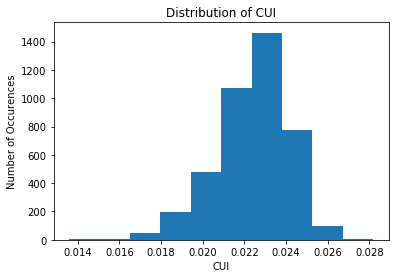

In [15]:
# Plot the distribution of CUI values
plt.hist(list(Norm_Counts['CUI']))
plt.xlabel('CUI')
plt.ylabel('Number of Occurences')
plt.title('Distribution of CUI')

### Below we will look for statistical differences between the ribosomal and non-ribosomal proteins.

The ribosomal proteins have a mean CUI of 0.0232 while the non-ribosomal proteins have a CUI of 0.0224.

We'll use a box-and-whisker plot to visualize the distributions side-by-side.


In [16]:
# Put the CUI values into the gene table and select a subset of this table
gene_table['CUI'] = Norm_Counts['CUI']
df2 = df.set_index('Locus tag').join(Norm_Counts[['CUI']])[['Locus', 'Protein name', 'CUI']]

In [17]:
# Plot the statistics for the ribosomal proteins
df2.loc[df2['Protein name'].str.contains('ribosomal')]['CUI'].describe()

count    66.000000
mean      0.023201
std       0.001323
min       0.018761
25%       0.022569
50%       0.023277
75%       0.024085
max       0.025576
Name: CUI, dtype: float64

In [18]:
# Plot the statistics for the non-ribosomal proteins
df2.loc[~df2['Protein name'].str.contains('ribosomal')]['CUI'].describe()

count    4074.000000
mean        0.022396
std         0.001727
min         0.013575
25%         0.021451
50%         0.022586
75%         0.023615
max         0.028185
Name: CUI, dtype: float64

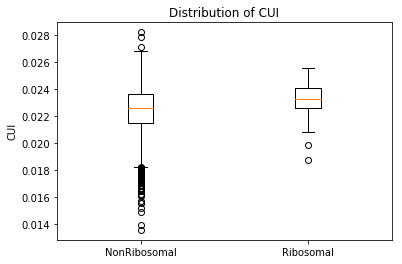

In [19]:
# Create series from the two groups
y = list(df2.loc[df2['Protein name'].str.contains('ribosomal')]['CUI'])
x = list(df2.loc[~df2['Protein name'].str.contains('ribosomal')]['CUI'])

# Plot the Box and Whisker Plot
plt.boxplot([x, y], labels=['NonRibosomal', 'Ribosomal'])
plt.ylabel('CUI')
plt.title('Distribution of CUI')
plt.show()